# __ECL__ 2023-24

## BE Travail à faire "Text Mining"

<font size="5"> Analyse de Polarités +  Classification de phrases</font>

**Elève : TARIQ CHELLALI**




- Appliquer de multiples techniques/méthodes et donner un tableau comparatif sur la base de donnée **movie_reviews**

Voici un résumé  des scores des différents modèles de classification appliqué à la base **movie_reviews** :

| Modèles                                                 | score |
|--------------------------------------------------------|-------------|
| DecisionTreeClassifier (arbre de décision)                  | 0.7291     |
| Random Forest                 |0.8357                         |
| Modèle linéaire (LogisticRegression)                   | 0.8379      |
| Evaluation : ROC de RF                | AUC = 0.8379     |
| Multinomial Bayesian (MNB)                             | 0.8338      |
| RandomForest                                           | 0.8396      |
| RandomForestClassifier (n_estimators=150, max_depth=90)| 0.8461      |
| RandomForestClassifier (n_estimators=100, max_depth=70)| 0.8471      |
| Gradient Boost | 0.5688     |
| SVM linéaire avec OneVsRestClassifier                  | 0.8968      |
| LogisticRegression avec données lemmatisées (bi-gramme)| 0.8987      |
| LogisticRegression avec Cross-validation  les données de base            | 0.9162      |
| MultinomialNB sur les données de base                  | 0.8862      |
| MNB avec Validation Croisée (XV)                       | 0.8868      |
| RandomForestClassifier avec SVD                        | 0.7139      |
| LogisticRegression avec SVD                            | 0.7944      |
| TF-IDF -> SVD -> LogisticRegression                    | 0.8769      |
| LogisticRegression sur word2vect  (model gensim)                     | 0.6219      |
| LogisticRegression sur word2vect (modele pré-entrainé de google)    | 0.8336      |
| RandomForest sur word2vect (modele pré-entrainé de google)    | 0.7934      |
| SVM sur word2vect (modele pré-entrainé de google)    | 0.8477      |
| MLPClassifier sur word2vect (modele pré-entrainé de google)    | 0.841      |

Nous remarquons que :

| Description          | Modèle                                     | Performance |
|----------------------|--------------------------------------------|-------------|
| Performance maximale | LogisticRegression avec Cross-validation les données de base   | **0.9162**      |
| Performance minimale | LogisticRegression sur word2vect (model gensim)          | **0.6219**      |


<font size="5"> Classification de phrases </font>
En fouille de données textuelles, plus le vocabulaire est étendu, plus il faut des données !

Le problème traité ici est (assez) classique en Text-Mining, on cherche à catégoriser des phrases en **Polarite positif ou négatif**. Ce pourrait être aussi classer des spams, résumer un texte, .....

Le problème est ici simplifié : une donnée = **une phrase** suivie d'un **label**.

# 1- Les données

On utilisera le jeu de données **"Movie_reviews.csv"**.

Il faut installer (une seule fois), pour avoir ces données (et plein d'autres). **Voir la cellule ci-dessus**
* !pip3 install papierstat.datasets
* !pip3 install papierstat
* !pip3 install dbfread
* !pip3 install geopandas
* !pip3 install pyensae


## 1.1 - Chargement des données

### 1.1.1) Chargement de la BD   __Soit directement par__  pip

In [4]:
if True : # déjà fait ! Pour refaire, remplacer "False" par "True"
    !pip install papierstat
    !pip install pyquickhelper
    !pip install --upgrade pip
    !pip install dbfread
    !pip install pyensae
    !pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyquicksetup: filename=pyquicksetup-0.2.4-py3-none-any.whl size=6711 sha256=3a623abde345a79dd3d0f5e70ba97626cf15d1586462c68331eebd38b7c5d117
  Stored in directory: /root/.cache/pip/wheels/37/be/8e/de24987fe1693d9c54ac697d5dfa8762422350c6d5732abe0f
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=a2b6a8804298abc9dc8b5b1e513987f3e3c16091f2bce33c91ed7061ced73e68
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c

### 1.1.2) Chargement de la BD :

Nous allons charger la base de données **movie_reviews.csv**


In [2]:
import csv
import pandas as pd
# csv_txt="/content/drive/MyDrive/BE_apprentissage_bayesien/movie_reviews.csv"
csv_txt="./data/movie_reviews.csv"
df_movies= pd.read_csv(csv_txt, header=0)
df_movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 1.2- Préparation des données     
### 1.2.1) Transformer la colone sentiment
   

In [3]:
# Displaying the columns and their data types
df_movies.dtypes


review       object
sentiment    object
dtype: object

Nous remarquons sue la colonne **sentiment** est de type texte et prend deux valeurs  : *positif* ou *négatif*. Nous allons transformer cette colonne de telle sorte que: 
- positive ---> 1
- négative ---> 0

In [4]:
# Converting the sentiment to a single column with 1 for 'positive' and 0 for 'negative'
df_movies['sentiment'] = df_movies['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

df_movies.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Vérifions que nous avon sbien 2 colonnes :

In [7]:
df_movies.shape

(50000, 2)

### 1.2.2) Renommage  des colonnes (attributs)   
Pour plus de clarté, on **renomme** les colonnes des données en 'Avis' et 'Polarite'
* __Avis__ est l'avis exprimé
* __Polarite__ est l'opinion (sentiment) (0 ou 1 : négatif ou positif)

In [6]:
df_movies=df_movies.rename(columns = {'review': 'Avis', 'sentiment' : 'Polarite'})
df_movies

,Avis,Polarite
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


__Info :__ Les attributs (les colonnes de la matrice) sous 2 formes :

In [7]:
# Les attributs (colonnes)
df_movies.columns.values

array(['Avis', 'Polarite'], dtype=object)

In [8]:
df_movies.columns

Index(['Avis', 'Polarite'], dtype='object')

__Info : Combien de chaque polarité__ ?

In [9]:
# Le bon groupement
df_movies.groupby(['Polarite']).count()

,Avis
Polarite,
0,25000
1,25000


# 2- Vers l'analyse des "avis" (*sentiments*)
## 2.1- Répartition des données pour l'analyse
On les divise en 2 ensembles d'__apprentissage__ et de __test__

__On découpe en train and test : par défaut 80% et 20%__

In [10]:
### Pour changer les proportions par défaut et avoir par exemple 80% 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(df_movies[["Avis"]], df_movies['Polarite'], train_size=0.80, test_size=0.2)

__Combien dans chaque paquet train / test ?__

In [11]:
X_train.shape  # les dimensions : (nb_lignes, nb_cols)

(40000, 1)

In [12]:
X_test.shape

(10000, 1)

**Text Mining : l'approche classique (vector space)**      
    
<font color="red"> TfIdf </font> est une méthode de convertion ses __mots__  en attributs __numériques__ (*features du vector space*).
* `Tf(terme)` : *term fréquency* (pour un mot/terme) = la fréquence d'un terme dans le document
* `Idf(terme)` : *Inverse document Frequency* (pour un mot/terme) = log(nombre total de documents __divisé__ par le nombre de documents où ce terme  apparaît;
* `TfIdf(terme)` : $TF(terme) \times Idf(terme)$

## 2.2- Calcul de la matrice numérique

#### 2.2.2 : Stemming et Lemmatization  de notre corpus

**on filtre les mots (lemmatization) pour ne garder que les mots significatifs, ensuite on calcule la matrice TfIdf**
 
On importe d'abord quelques outils.

Importation du nécessaire

In [17]:
if True : # SI déjà fait, ne pas refaire
    !pip install textblob
    import nltk
    nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [18]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [19]:
import nltk
from nltk.corpus import stopwords
import numpy as np

# Une seule fois :
if True : # Si déjà fit
    nltk.download('wordnet')
    nltk.download('words')
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('stopwords')
    nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob, Word

import string

# Initialisation du "Wordnet Lemmatizer"
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("bats"))


from nltk.corpus import brown  # Il y a davantage de mots ici
words = set(brown.words())

#words = set(nltk.corpus.words.words()) : pas beaucoup de mots !
stop_words=set(stopwords.words('english')); # ";" pour ne pas avoir les résultats !

bat


### 2.2.2.1 Lemmatization

__On définit notre lemmatizer qui pré-traitera  le corpus!__
1) vérifier que nos "mots" sont parmi les mots acceptables (non "usuels") : dans "words"
2) enlever les mots usuels (stopwords)
3) enlever qq mots étranges
4) enlever les ponctuations
5) etc.
6) Lemmatiser !    

N.B. 'le' et 'u' sont mis "à la main" !

In [21]:
def lemma(texte) :
    #renvoie lemmatizer.lemmatize(texte)
    return [lemmatizer.lemmatize(t) for t in word_tokenize(texte) if \
            t.lower() in words and \
            t.lower() not in stop_words \
            # cas des strs spécifiques non filtrés
            and t not in ["''", '--', '1.2', '1/2', '18th', '2-3', '20th', '4.00', '4.2', '``', 'le', 'u', 'la']\
            #and t.lower() not in word_tokenize(stop_words).encode() \ # génère un pb de 'byte' ?!
            and t.lower() not in string.punctuation and not t.isdigit()]


<font color="red"> Ici : si warning sur stopwords, lancer cette cellule une 2e fois </font>

__Appliquer puis afficher quelques informations sont le corpus restant__

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline

count_vec_lemmatise = CountVectorizer(tokenizer=lemma, stop_words="english", analyzer='word',
                            ngram_range=(1, 1), max_df=1.0, min_df=0.0, max_features=None)

# Transformer les données en  bag of words
count_train = count_vec_lemmatise.fit(df_movies["Avis"])

bag_of_words_of_corpus = count_vec_lemmatise.transform(df_movies["Avis"])

# On enlève qq termes inutiles qui nous ont échappés (qui ont été créés par lemmatize)
# Il s'agit d'un Dict de Python.
for terme_a_jeter in ['n', 'u', 'ft'] :
    count_train.vocabulary_.pop(terme_a_jeter, terme_a_jeter+" n'y est ps !")


# Quelques prints
print("Il y a ", len(count_train.vocabulary_), " termes dans le vocabulaire\n")

# Print Les 50 premiers termes
print("Les 50 premiers termes:\n{}".format(np.array(count_vec_lemmatise.get_feature_names_out()[:50])))
print("\nTous les 50 termes:\n{}".format(np.array(count_vec_lemmatise.get_feature_names_out()[::50]))) # Tous les 50 termes
#print(type(count_train.vocabulary_))
#print("Vocabulary content:\n {}".format(count_train.vocabulary_))

#les 50 premiers mots et leur nbr d'occurrence
print("\nLe nbr d'occurrence des 50 premiers termes :")
print([(k,v)  for k,v in count_train.vocabulary_.items()][:50])

print("\nLe nbr d'occurrence des 50 premiers termes :")
print([(k,v)  for k,v in count_train.vocabulary_.items()][-50:])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  warnings.warn(


Il y a  22970  termes dans le vocabulaire

Les 50 premiers termes:
["'20s" "'30s" "'38" "'48" "'50" "'51" "'53" "'54" "'55" "'58" "'60"
 "'60s" "'61" "'76" "'90s" "'bout" "'em" "'fess" "'im" "'low" "'most"
 "'nother" "'nuff" "'pache" "'round" "'till" "'way" '-ing' '-ism' '0.1'
 '0.10' '0.2' '0.5' '1,000' '1,000,000' '1,400' '1,500' '1,600' '1,700'
 '1-0' '1-1/2' '1-3' '1.0' '1.00' '1.07' '1.1' '1.25' '1.5' '1.8' '1/3']

Tous les 50 termes:
["'20s" '1/4' '1950s' '26-year-old' '4.0' '6.3' 'aback' 'abrupt'
 'accentuated' 'accounting' 'acreage' 'additionally' 'admitted'
 'advertisement' 'afflicted' 'agin' 'airport' 'all-important' 'ally'
 'ambiance' 'amusing' 'anguish' 'anterior' 'apathetic' 'applicable'
 'approximation' 'aristocracy' 'arterial' 'aspen' 'associate' 'atomic'
 'attribute' 'authorizes' 'avocation' 'baby-sitter' 'balanced'
 'bankruptcy' 'bartender' 'bawling' 'bedlam' 'behaviorally' 'benefactor'
 'better-than-average' 'billing' 'blackened' 'blessing' 'bloodshot' 'boar'
 'boltin

In [23]:
!pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 76.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.8/348.8 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.6 MB/s eta 0:00:00
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=4b4603dbc3199b90b5f7a8a8f837e71aecd261a40d658b7beeefd58820f89ef8
  Stored in directory: /root/

### Deuxième méthode (lametization)

In [24]:

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

if True : # Mettre 3false" pour ne pas afficher des messages d'erreur
    # Il y a des problèmes avec la ligne suivante sur certaine machines
    from pattern.en import lemma,lexeme
    import nltk
    from sklearn.feature_extraction.text import CountVectorizer

    class LemmaTokenizer(object):
        def __init__(self):
            self.wnl = WordNetLemmatizer()
        def __call__(self, articles):
            #return [lemma(t) for t in word_tokenize(articles) if t.lower() in words]

            return [lemma(t) for t in word_tokenize(articles) if t.lower() in words and \
                    t.lower() not in stop_words \
                    #and t.lower() not in word_tokenize(stop_words).encode() \ # génère un pb de 'byte' ?!
                    # cas des strs spécifiques non filtrés
                    and t not in ["''", '--', '1.2', '1/2', '18th', '2-3', '20th', '4.00', '4.2', '``']\
                    and t.lower() not in string.punctuation and not t.isdigit()]



    words = set(nltk.corpus.words.words())

    count_vec_lemmatise = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words="english", analyzer='word',
                                ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

    # Transforms the data into a bag of words
    count_train = count_vec_lemmatise.fit(df_movies["Avis"])
    bag_of_words = count_vec_lemmatise.transform(df_movies["Avis"])

    # Print the first 10 features of the count_vec
    print("Les 50 premiers termes:\n{}".format(count_vec_lemmatise.get_feature_names_out()[:50]))
    print("\nTous les 50 termes:\n{}".format(count_vec_lemmatise.get_feature_names_out()[::50])) # Tous les 50 termes
    #print(type(count_train.vocabulary_))
    #print("Vocabulary content:\n {}".format(count_train.vocabulary_))

    #les 50 premiers mots et leur nbr d'occurrence
    print("\nLe nbr d'occurrence des 50 premiers termes :")
    print([(k,v)  for k,v in count_train.vocabulary_.items()][:50])

Les 50 premiers termes:
['aa' 'aardvark' 'ab' 'aba' 'aback' 'abandon' 'abandonment' 'abash'
 'abatement' 'abba' 'abbasi' 'abbey' 'abbot' 'abbreviate' 'abdomen'
 'abdominal' 'abduct' 'abduction' 'abductor' 'aberrant' 'aberration'
 'abeyance' 'abhor' 'abhorrence' 'abhorrent' 'abide' 'abigail' 'ability'
 'abject' 'abjectly' 'ablaze' 'able' 'abler' 'ablest' 'ably' 'abnegation'
 'abnormal' 'abnormality' 'abnormally' 'aboard' 'abolish' 'abolition'
 'abolitionism' 'abolitionist' 'abominable' 'abominably' 'abomination'
 'abominator' 'aboriginal' 'aborigine']

Tous les 50 termes:
['aa' 'abort' 'abysmal' 'accost' 'acquittal' 'adapter' 'admission'
 'adversely' 'affinity' 'aggravatingly' 'aimlessnes' 'alcohol' 'allot'
 'alum' 'amendment' 'amusedly' 'ancillary' 'anna' 'anthropic' 'anythe'
 'appease' 'approximation' 'architecturally' 'armpit' 'artificially'
 'aspirin' 'astor' 'atrium' 'audio' 'autocracy' 'avow' 'babu' 'bag'
 'balloonist' 'bannister' 'barmaid' 'basi' 'bawl' 'becker' 'behalf'
 'bemuse

#### 2.2.3.2 **Calcul TfIdf de notre corpus**

<font color="red" size="3"> Si vous avez installé "Pattern", vous pouvez changer la 1ere ligne de 1a cellule
suivante par :      
    
TfIdf_lemmatise = TfidfVectorizer(tokenizer=lemma, stop_words="english",\
     smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [26]:
TfIdf_lemmatise = TfidfVectorizer(tokenizer=lemma, stop_words="english",
     smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
# max_df = min_df : par default=1.0

corpus_fitted = TfIdf_lemmatise.fit(df_movies["Avis"])
train_lemmatise_transformed = corpus_fitted.transform(X_train["Avis"])
test_lemmatise_transformed = corpus_fitted.transform(X_test["Avis"])

# Une partie de la matrice TDIDF
temp_df=pd.DataFrame(train_lemmatise_transformed.toarray(), columns=TfIdf_lemmatise.get_feature_names_out())

#print(temp_df.columns.values)
print("1) Les 10 dernières lignes de la  matrice TfIdf (en ligne : les indices, en colonne les termes/mots) :")
print(temp_df.tail(10))
print( "-"*50)

df_idf = pd.DataFrame(TfIdf_lemmatise.idf_, index=TfIdf_lemmatise.get_feature_names_out(),columns=["idf_weights"])
print("2) Quelques indice Idf pour certains mots :")
print(df_idf)
print("-"*50)

print("2bis) Le 100 premiers termes : colonnes de la matrice TfIdf")
liste_termes=TfIdf_lemmatise.get_feature_names_out()
print(liste_termes[:100])
print("-"*50)

print("3) Le 100 derniers termes de la matrice = colonnes de la matrice")
print(liste_termes[-100:])
print("-"*50)

print("Il y a 2400 documents, 3204 termes ")
print ("4) La matrice sur X_train : \n", train_lemmatise_transformed.toarray())

print("-"*50)
print("5) Les 50 premiers termes du vocabulaire  et leur indices :")
print([(k,v)  for k,v in TfIdf_lemmatise.vocabulary_.items()][:50])

print("Voici les vecteurs de quelques termes :")
try : # Suivant le mot donné, il y a erreur si le mot n'existe pas
    print("\nvaleur de Zero", TfIdf_lemmatise.vocabulary_["zero"])
    TfIdf_lemmatise.vocabulary_['zero']
except :
     print("Certains mots / temes n'existent pas")

try : # Suivant le mot donné, il y a erreur si le mot n'existe pas
    print(pd.DataFrame([temp_df["yucky"]], index=["yucky"]).T)
except :
     print("Certains mots / temes n'existent pas")

try : # Suivant le mot donné, il y a erreur si le mot n'existe pas
    print(pd.DataFrame([temp_df["young"]], index=[" young"]).T)
except :
     print("Certains mots / temes n'existent pas")

try : # Suivant le mot donné, il y a erreur si le mot n'existe pas
    print(pd.DataFrame([temp_df["yellow"]],index=["yellow"]).T)
except :
     print("Certains mots / temes n'existent pas")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


1) Les 10 dernières lignes de la  matrice TfIdf (en ligne : les indices, en colonne les termes/mots) :
            \t               !          "    #    $    %         &  ...  \
39990  0.0  0.0  0.0  171.0  0.0   0.000000  0.0  0.0  0.0  0.000000  ...   
39991  0.0  0.0  0.0  123.0  0.0  17.624115  0.0  0.0  0.0  0.000000  ...   
39992  0.0  0.0  0.0  276.0  0.0   0.000000  0.0  0.0  0.0  0.000000  ...   
39993  0.0  0.0  0.0  154.0  0.0   0.000000  0.0  0.0  0.0  0.000000  ...   
39994  0.0  0.0  0.0  259.0  0.0   0.000000  0.0  0.0  0.0  0.000000  ...   
39995  0.0  0.0  0.0  381.0  0.0   0.000000  0.0  0.0  0.0  0.000000  ...   
39996  0.0  0.0  0.0  586.0  0.0  49.347522  0.0  0.0  0.0  0.000000  ...   
39997  0.0  0.0  0.0  289.0  0.0   0.000000  0.0  0.0  0.0  0.000000  ...   
39998  0.0  0.0  0.0   63.0  0.0   3.524823  0.0  0.0  0.0  0.000000  ...   
39999  0.0  0.0  0.0  262.0  0.0  24.673761  0.0  0.0  0.0  3.888853  ...   

         “    ”    …    ″    ₤    ▼    ★    、    

<font size="4"> On a maintenant la matrice TdIdf.</font>
On peut déjà faire des calculs de similarité avec.  

### Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Un exemple de vecteur
print("Un exemple d'avis : ", np.array(X_test["Avis"])[0])

indice_query=1

# QQ affichages : on le refait ensuite (voir query_TFIDF)
#vecteur = TfIdf_lemmatise.transform([np.array(X_test["Avis"])[indice_query]]) # ZZ : [] important
#print("\nLe vecteur TfIdf : " , vecteur.toarray())
#print("\nLe TfIdf du vecteur : ", vecteur)
# ZZ : ci-dessous, les affichages donnent les indices aussi. Seul les réels = TfIdf
#print("\nET les indices non nuls de ce vecteur : ", end='')
#print(np.nonzero(vecteur.toarray())[1])# Les éléments non nul
#print("**", np.nonzero(vecteur)[1])# Les éléments non nul
print('---------------')

# Pour le cas de l'avis  d'indice indice_query
query_TFIDF = TfIdf_lemmatise.transform([np.array(X_test["Avis"])[indice_query]])
print("\nTFIDF du query :", query_TFIDF)

cosine_similarities = cosine_similarity(query_TFIDF, train_lemmatise_transformed).flatten()
related_product_indices = cosine_similarities.argsort()[:-11:-1]
print("\ncosine_similarities entre les 2 phrases :", cosine_similarities)

print("\nelements non. nuls  du consine : ", cosine_similarities[np.nonzero(cosine_similarities)])
# print(cosine_similarities[np.count_nonzero(cosine_similarities, axis=0)])
print("\nLes indices des documents proches du query avec similarité par cosinus p/r à train set:")
print(related_product_indices)

words= np.array(X_test["Avis"])[indice_query]
print("\nLe query = ", words)

# Quelques un des documents proches :
print("\nLes documents proches du Query :", np.array(X_test["Avis"])[indice_query])
for ind in related_product_indices :
    print("un docmument proche :", X_train.iloc[ind][0])



Un exemple d'avis :  Craig Brewer is now officially a writer/director for whom I will see any film by, no matter how bad it may look. His debut, Hustle and Flow, was one of my favorites from that year, with its emotionally charged storyline and realistic, fallible characters. I wasn't quite sure what I would end up thinking after seeing this sophomore effort. The cast seemed great, the trailer used music effectively, however, it seemed like there was a good chance it would cross into absurdity, and fast. Fortunately, Black Snake Moan hits all its marks dead-on. The acting is astonishing, the writing superb, and the editing style, as well as juxtaposed music, riveting the whole way. Brewer seems to be a master at getting his characters to have the right mix of both compassion and malice as they set forward on their paths toward redemption.<br /><br />The first moment I knew I was in for a treat was during the abbreviated credit sequence at the beginning. Like he did with Hustle and Flow

**Rappel des dimensions de notre corpus (train & test)**

In [27]:
fit_train=train_lemmatise_transformed
fit_test = test_lemmatise_transformed
fit_train.shape, fit_test.shape

((40000, 160), (10000, 160))

### 2.3 : Supplément : calcul TfIdF (vactor space) sur le corpus par un Pipeline

**Pour calculer l'indice TfIdf dans le corpus, il faut d'abord compter le nombre d'occurrence du mot puis calculer son Tf puis son Idf et enfin son TfIdf.**

Les deux étapes (comptage et TfIdf) peuvent être mises en séquence à l'aide d'un *pipeline*.

Pour __"pipeline"__, voir https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

__CountVectorizer__ produit un sac de mots (bag of words) : un vecteur avec le nbr d'occurrenecs des mots

__TfidfTransformer__ prend ce "sac" et le transforme en une matrice avec la fréquence tf-idf (term frequency * inverted document frequency).

*make_pipeline* regroupe les deux actions (qui peuvent également être faites séparément)

On peut créer des pipelines à multiples étages qui enchainent les actions d'un étage au suivant :

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

<font color="red">**Remarque**</font>

<font color="red">* On a fait le même travail plus haut en Lemmatisant et on a déjà créer fit_train et fit_test</font>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline

if True :
    # On a fait le travaille plus haut et déjà créer fit_train et fit_test
    pipe = make_pipeline(CountVectorizer(), TfidfTransformer()) # Construire un Construct a Pipeline from the given estimators.
    pipe.fit(X_train['Avis'])

    fit_train = pipe.transform(X_train['Avis'])
    fit_train.shape


In [ ]:
print(fit_train.min(), fit_train.max())

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
0.0 0.9906546770580443


In [ ]:

fit_test = pipe.transform(X_test['Avis'])
print(fit_test.shape)

(10000, 93030)


##  Partie Analyse
### 2.4- Modèle arbre de décision
**Un seul arbre de décision produira des résultats assez médiocres.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(fit_train, y_train)
dt.score(fit_test, y_test)

0.7291

**Le score est assez __médicore__; ce sera une base de comparaison.**

### 2.5- Modèle Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(fit_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
clf.score(fit_test, y_test)

0.8357

<font color="red"> **Le score s'est un peu amélioré.**</font>

#### 2.5.1- D'autres métriques d'évaluation

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
score_t = clf.predict_proba(fit_test)
score_a = clf.predict_proba(fit_train)
print(f"{score_t=}")
print(f"{score_a=}")


score_t=array([[0.26, 0.74],
       [0.72, 0.28],
       [0.18, 0.82],
       ...,
       [0.52, 0.48],
       [0.1 , 0.9 ],
       [0.56, 0.44]])
score_a=array([[0.12, 0.88],
       [0.24, 0.76],
       [0.18, 0.82],
       ...,
       [0.22, 0.78],
       [0.2 , 0.8 ],
       [0.98, 0.02]])


#### 2.5.2 Courbe ROC

In [ ]:
fpr_t, tpr_t, seuil_t = roc_curve(y_test, score_t[:, 1])
fpr_a, tpr_a, seuil_a = roc_curve(y_train, score_a[:, 1])

In [ ]:
%matplotlib inline

#### 2.5.2.1 Courbe ROC (tpr vs. fpr)

Remarquer l'AUC



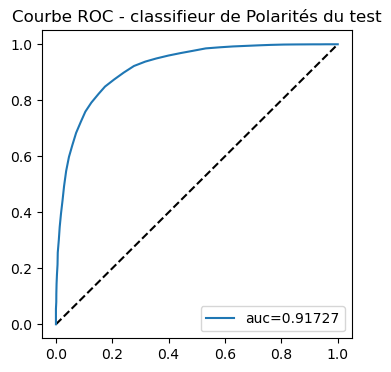

In [ ]:
import matplotlib.pyplot as plt
if True :
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    ax.plot([0, 1], [0, 1], 'k--')
    aucf_t = auc(fpr_t, tpr_t)
    ax.plot(fpr_t, tpr_t, label='auc=%1.5f' % aucf_t)
    ax.set_title('Courbe ROC - classifieur de Polarités du test')
    ax.legend();

print("Remarquer l'AUC\n")

#### 2.5.3 Comparaison des ROC du train et du test

('Les AUCs train/test:', 1.0, 0.9172693652393754)

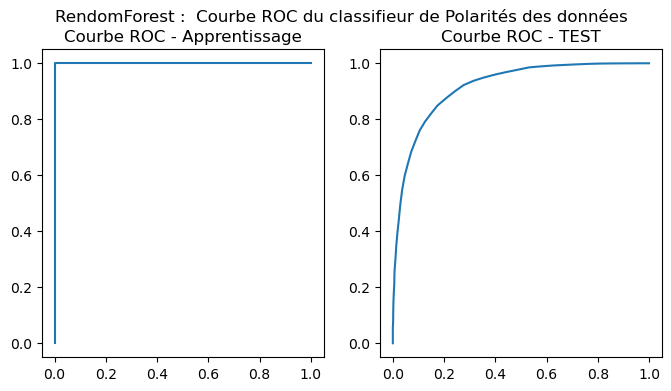

In [ ]:
import matplotlib.pyplot as plt

aucf_t = auc(fpr_t, tpr_t)
aucf_a = auc(fpr_a, tpr_a)
fig, axs = plt.subplots(1, 2, figsize=(8,4))

axs[0].plot(fpr_a, tpr_a, label='auc=%1.5f' % aucf_t)
axs[0].set_title('Courbe ROC - Apprentissage')
axs[1].plot(fpr_t, tpr_t, label='auc=%1.5f' % aucf_a)
axs[1].set_title('Courbe ROC - TEST')

fig.suptitle('RendomForest :  Courbe ROC du classifieur de Polarités des données')
("Les AUCs train/test:", aucf_a, aucf_t)

# 3. A propose des classifieurs en Text Mining (espace vectoriel) appliqués sur cette DB.
-  La transformation du texte en feature génère beaucoup de variables;
- __RF__ : Random Forest est une méta méthode aggrégative. Il peut y avoir des problèmes avec RF.
    - Intuitivement, il y a un grand risque d'overfitting dans une espace à plusieurs centaines de dimensions, et donc quasiment vide d'échantillons.
    - Un des aspects à prendre en compte dans RF est la profondeur de l'arbre. Par défaut, elle est de 10, soit  210=1024  décisions de seuils, soit au mieux  210  variables ce qui est loin du nombre de variables total.

- __AD__ :  en présence de beaucoup de variables et un arbre de décision n'exploite quasiment que le fait qu'elles soient non nulles.
    - Un arbre de décision consiste à prendre des décisions sur des seuils puis retourne une constante tirée d'une feuille de l'arbre.
- __Modèles Linéaires__ : Un modèle linéaire ferait tout aussi bien l'affaire avec en plus la possibilité de tenir compte de la valeur de la variable.
    - __MNB__ : le Multinomial Naive Bayes (utilisé pour la détection de spam), qui marche  bien sur BOW (les sacs de mots)
    - __Logit__ :  La régression logistique fonctionne assez bien.
    - __SVM Linéaire__ : LinearSVM est assez efficace aussi sur ces modèles.

- Ces classificateurs améliorent sensiblement les performance des modèles

- Les __n-grammes__ n'améliorent pas significativement les performances,
- __SVD__ détériore parfois les performances
- __word2vect__ améliore légèrement les performances.

In [ ]:
fit_test.shape

(10000, 22973)

## 3.1-__modèle linéaire__

Essayons d'abord avec un __modèle linéaire__ (__logit__).

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(fit_train, y_train)
lr.score(fit_test, y_test)

c:\Users\tariq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8379

**On constae une amélioration du score**

## 3.2- Multinomial Bayesian (MNB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(fit_train, y_train)
mnb.score(fit_test, y_test)

0.8338

**On obtient encore un bon score**

## 3.3- Retour au RandomForest
* Si on augmente la profondeur de l'arbre, la forêt aléatoire peut __parfois__ être plus performante.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf20 = RandomForestClassifier(n_estimators=120, max_depth=20)
clf20.fit(fit_train, y_train)
clf20.score(fit_test, y_test)

0.8396

**On obtient un score pas tellement mieux.**  

### 3.3.1 Itération su Random Forest   
Essayons d'autre combinaisons des paramètres dans une itération

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clfs=[("clf"+str(N)+','+str(depth), RandomForestClassifier(n_estimators=N, max_depth=depth))  for N in range(1,200,50) for depth in range(10,100,20)]
for nom, _clf_ in clfs :
    _clf_.fit(fit_train, y_train)
    print(nom, ' : score = ', _clf_.score(fit_test, y_test))


clf1,10  : score =  0.5937
clf1,30  : score =  0.6486
clf1,50  : score =  0.6191
clf1,70  : score =  0.641
clf1,90  : score =  0.625
clf51,10  : score =  0.8
clf51,30  : score =  0.8267
clf51,50  : score =  0.8317
clf51,70  : score =  0.8338
clf51,90  : score =  0.8228
clf101,10  : score =  0.8237
clf101,30  : score =  0.8407
clf101,50  : score =  0.8425
clf101,70  : score =  0.8436
clf101,90  : score =  0.8484
clf151,10  : score =  0.8254
clf151,30  : score =  0.8413
clf151,50  : score =  0.8489
clf151,70  : score =  0.8503
clf151,90  : score =  0.85


**La dernière combinaison semble meilleure**

### 3.3.2 Une des meilleures combinaisons (?)

In [ ]:
clf50_ = RandomForestClassifier(n_estimators=150, max_depth=90)
clf50_.fit(fit_train, y_train)
clf50_.score(fit_test, y_test)

0.8461

In [ ]:
clf50_ = RandomForestClassifier(n_estimators=100, max_depth=70)
clf50_.fit(fit_train, y_train)
clf50_.score(fit_test, y_test)

0.8471

#### 3.3.3.  Et une autre (200 arbres, profondeur max = 100)

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf50 = RandomForestClassifier(n_estimators=200, max_depth=100)
clf50.fit(fit_train, y_train)
clf50.score(fit_test, y_test)


0.6429

## 3.4- Gradient Boost
* Un méta-modèle de __gradient boosting__ devrait dépasser les RFs puisque les arbres ne sont plus appris indépendemment les uns des autres.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbc40 = GradientBoostingClassifier(n_estimators=200, max_depth=40)
gbc40.fit(fit_train, y_train)
gbc40.score(fit_test, y_test)

0.5688

## 3.5- SVM linéaire avec la méthode OneVsRestClassifier

Connu également sous le nom de one-vs-all  
dans cette méta-classifieur, on crée un classifieur per classe.

**Cette méta-méthode a besoin** (en paramètre) d'une méthode de classification à utiliser.

Extrait de la Doc :

For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, __it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice__.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modele_one_vs_linear_SVC= OneVsRestClassifier(LinearSVC())
modele_one_vs_linear_SVC.fit(fit_train, y_train)
modele_one_vs_linear_SVC.score(fit_test, y_test)

0.8968

__On constate que SVM se comporte (comme souvent) bien !__

## 3.6- Classifieur SVM linéaire avec la méthode OneVsRestClassifier

Même chose mais on utilise la méthode SVM (pour la classification : SVC)


In [32]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modele_one_vs_SVC = OneVsRestClassifier(SVC())
modele_one_vs_SVC.fit(fit_train, y_train)
modele_one_vs_SVC.score(fit_test, y_test)

0.6219

<font color="red"> **Et en fonction des score, on choisit une des méthodes.**</font>

Pour simplifier, on choisit ici la régression logistique (**logit**) pour la suite.

**MNB peut aussi faire l'affaire (voir ci-dessous).**

# 4- Les n-grammes
L'approche Bag of Word (matrices Tf, TfIdf)  ci-dessus ne tient pas compte ni du contexte, ni de l'ordre des mots. Chaque phrase est convertie en un sac de mots (ou bag of words).

On va tenir compte de séquence plus ou moins longue à l'ide des __n-grams__.

In [ ]:
# s'il faut télécharger des données
#
nltk_fait = True # A mettre dès le premier download (voir plus haut)
if not nltk_fait :
    import nltk
    nltk.download('punkt')
    nltk_fait == True


## 4.1 : Un exemple de 3-gram

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
generated_ngrams = ngrams(word_tokenize(X_train.iloc[0,0]), 3, pad_left=True, pad_right=True)
list(generated_ngrams)[:7]

[(None, None, 'Edward'),
 (None, 'Edward', 'Dmytryk'),
 ('Edward', 'Dmytryk', 'directed'),
 ('Dmytryk', 'directed', 'this'),
 ('directed', 'this', 'shadowy'),
 ('this', 'shadowy', 'movie'),
 ('shadowy', 'movie', 'about')]

## 4.2- Utilisation du bi-gram     


**On applique le principe de bi-gramme avec scikit-learn.**

**On lémmatise,puis TfIdf sur les bi-grammes**

Appliqué aux données de base.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe2 = make_pipeline(CountVectorizer(ngram_range=(1, 2)), TfidfTransformer())
pipe2.fit(X_train['Avis'])
fit_train2 = pipe2.transform(X_train['Avis'])
fit_train2.shape

(40000, 2108120)

Il y a plus de colonnes (normal !)

**On vérifie** que les features ressemblent à des couples de mots (non traités / pas de lemmatisation).

In [ ]:
cl = pipe2.steps[0]
cl[1].get_feature_names_out()[100:110]

array(['000 audience', '000 bakhtiari', '000 bc', '000 bet', '000 big',
       '000 bombs', '000 bone', '000 books', '000 br', '000 brazilians'],
      dtype=object)

* Gagné (vérifié) !  

In [ ]:
fit_test2 = pipe2.transform(X_test['Avis'])
fit_test2.shape

(10000, 2108120)

### 4.2.1- Même aplication mais avec les données lemmatisées

Appliqué aux données lemmatisées. (si Warning, lancez une 2e fois)     
Si Warning, relancer !

In [ ]:
#count_vec_lemmatise = CountVectorizer(tokenizer=lemma, stop_words="english", analyzer='word',
#                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
if True :
    count_vec_lemmatise = CountVectorizer(tokenizer=lemma, stop_words="english", analyzer='word',
                                ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)
    pipe2_bis = make_pipeline(CountVectorizer(tokenizer=LemmaTokenizer(), stop_words="english", analyzer='word',
                                ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None), TfidfTransformer())
    pipe2_bis.fit(X_train['Avis'])
    fit_train2_bis = pipe2_bis.transform(X_train['Avis'])
    print(fit_train2_bis.shape)

c:\Users\tariq\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acros', 'afterward', 'alway', 'anythe', 'everythe', 'hundr', 'indee', 'les', 'make', 'nevertheles', 'nothe', 'perhap', 'seriou', 'somethe', 'thu', 'u', 'wherea'] not in stop_words.
  warnings.warn(


(40000, 1471725)


In [ ]:
if True :
    cl_bis = pipe2_bis.steps[0]
    cl_bis[1].get_feature_names_out()[100:110]

In [ ]:
fit_test2_bis = pipe2_bis.transform(X_test['Avis'])
fit_test2_bis.shape

(10000, 1471725)

## 4.3 - Application de la méthode Logit aux bi-grammes (crées sur les données de base)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(solver='lbfgs')


**Et on 'fit'**

In [ ]:
clf2.fit(fit_train2, y_train)

LogisticRegression()

Et on calcule le score

In [ ]:
clf2.score(fit_test2, y_test)

0.8987

<font color="red"> Ce qui améliore   les résultats de façon significative.</font>

### 4.3.1- Application de la méthode Logit aux bi-grammes (crées sur les données lemmatisées)
**La même chose avec les données lemmatisées :**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf2_bis = LogisticRegression(solver='lbfgs')


**Et on 'fit'**

In [ ]:
print(clf2_bis.fit(fit_train2_bis, y_train))

LogisticRegression()


ET on calcule le score

In [ ]:
print(clf2_bis.score(fit_test2_bis, y_test))

0.8766


**Pas TOP !!**

**pas tellement Encourageant ?? !**

## 4.4- Cross-validation



On ne l'applique qu'aux données de bse (non lémmatisées).

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf2_ = LogisticRegressionCV(cv=5)
clf2_.fit(fit_train2, y_train)

c:\Users\tariq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tariq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV(cv=5)

In [ ]:
clf2_.score(fit_test2, y_test)

0.9162

<font color="red">  Pas mal !</font>
    
__Rappel__ : Logit était un des meilleurs avec MNB.</font>


## 4.5-  Application de  MNB (sur les données de base)
**D'abord MNB sur les données de de base !**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(fit_train2, y_train)
mnb.score(fit_test2, y_test)

0.8862

## 4.6- MNB avec Validation Croisée (XV)

Pour rendre les résultats plus fiables, on doit faire XV en MNB.

Pour cela, on applique "k_folds MNB" en partant du début du DB, transformé en 2-grams ....

**K-folds** pratiqué sur l'ensemble des données

On a besoin de créer les folds soi-même pour MNB

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_movies[["Avis"]], df_movies['Polarite'])

df_all=df_movies[['Avis','Polarite']]
y_all=df_movies['Polarite']
x_all=df_movies["Avis"]

pipe2_ = make_pipeline(CountVectorizer(ngram_range=(1, 2)),TfidfTransformer())
pipe2_.fit(x_all)

feat_train2_ = pipe2_.transform(x_all)
print(feat_train2_.shape)
print(feat_train2_[0])
y_train2_=y_all

Nb_folds=20
k_fold = KFold(n_splits=Nb_folds , shuffle=True, random_state=0)
k_fold.get_n_splits(df_all)
print(k_fold)

(50000, 2468006)
  (0, 2460156)	0.06312244732574757
  (0, 2459694)	0.015657331418500838
  (0, 2456364)	0.030354118152065134
  (0, 2456295)	0.023043462602789406
  (0, 2455233)	0.019293482408135502
  (0, 2454885)	0.027260068249352832
  (0, 2440019)	0.056015415411665805
  (0, 2439952)	0.024089437504291555
  (0, 2439590)	0.03349160839673966
  (0, 2438485)	0.012073491396120916
  (0, 2430385)	0.04926680283261607
  (0, 2430236)	0.05035067559958957
  (0, 2430151)	0.04977922365885089
  (0, 2419675)	0.03343077043155168
  (0, 2419439)	0.033415662337708554
  (0, 2416595)	0.0477594459534412
  (0, 2414727)	0.032511056274860825
  (0, 2413603)	0.026210337211178682
  (0, 2408477)	0.03866046329787878
  (0, 2390058)	0.09345024020604871
  (0, 2388183)	0.020428108714313054
  (0, 2382620)	0.05345126498583529
  (0, 2380277)	0.012537581509352143
  (0, 2378871)	0.05250355281606642
  (0, 2377459)	0.0394845976562129
  :	:
  (0, 164111)	0.036666356824415394
  (0, 160383)	0.018079746346905883
  (0, 155094)	0.04226

### 4.6.1- Création du modèle -->  score poly K-Folds  MNB
**Avec 20-folds, on atteint 0.886 (mieux que  Logit)**

In [ ]:
import numpy as np
mnb2 = MultinomialNB()
Scores=[]

for i in range(Nb_folds) :
    #print(i, end=' ')
    res=next(k_fold.split(feat_train2_), None)
    x_train_ = feat_train2_[res[0]]
    x_test_ = feat_train2_[res[1]]
    y_train_  = y_all.iloc[res[0]]
    y_test_ = y_all.iloc[res[1]]
    model__ = mnb2.fit(x_train_, y_train_)
    predictions_ = mnb2.predict(x_test_)
    Scores.append(model__.score(x_test_, y_test_))
print('TRACE : Scores de chaque itération : ', Scores)
print('La moyenn : ', np.mean(Scores))
#mnb.fit(feat_train2, y_train)
# mnb.score(feat_test2, y_test)

TRACE : Scores de chaque itération :  [0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868, 0.8868]
La moyenn :  0.8868000000000003


<font color="red"> __On s'est donc fait une idée du meilleur résultat jsq'à présent !__</font>


## 4.7- A la recherche d'améliorer les résultats....


### 4.7.1  Réduction de dimension avec une SVD / ACP
On choisit la méthode TruncatedSVD plutôt que l'ACP dont l'implantation ne supporte pas les features creux(sparses).

### 4.7.2- Application du SVD à __Tf__ d'abord

In [ ]:
print(X_train.keys())
print(X_train['Avis'])

Index(['Avis'], dtype='object')
20379    If we consider three films with a similar subj...
19177    Once in a while you get amazed over how BAD a ...
6436     I've read countless of posts about this game b...
4176     If you have read the books then forget the cha...
13689    I had no expectations other than to be enterta...
                               ...                        
1480     Well I've enjoy this movie, even though someti...
24688    I liked this movie a lot. The animation was we...
41244    To say that Thunderbirds is a horrid, forced, ...
24177    Computer savvy John Light (as John Elias) goes...
11574    "A Slight Case of Murder" is an excellent TV m...
Name: Avis, Length: 37500, dtype: object


In [ ]:
from sklearn.decomposition import TruncatedSVD
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=100))
pipe_svd.fit(X_train['Avis'])
fit_train_svd = pipe_svd.transform(X_train['Avis'])
fit_train_svd.shape

(40000, 100)

### 4.7.3-  Application du  RF à ce résultat SVD

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_svd = RandomForestClassifier(n_estimators=50)
clf_svd.fit(fit_train_svd, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
fit_test_svd = pipe_svd.transform(X_test['Avis'])
clf_svd.score(fit_test_svd, y_test)

0.7139

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_svd = LogisticRegression(solver='lbfgs')
lr_svd.fit(fit_train_svd, y_train)
lr_svd.score(fit_test_svd, y_test)

0.7944

 ## 4.8-Comparaison des méthodes

**Repartons de TF-IDF puis SVD puis Logit pour comparer**

In [ ]:
pipe_svd_tfidf = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     TruncatedSVD(n_components=300))
pipe_svd_tfidf.fit(X_train['Avis'])
fit_train_svd_tfidf = pipe_svd_tfidf.transform(X_train['Avis'])

clf_svd_tfidf = LogisticRegression(solver='lbfgs')
clf_svd_tfidf.fit(fit_train_svd_tfidf, y_train)

fit_test_svd_tfidf = pipe_svd_tfidf.transform(X_test['Avis'])
clf_svd_tfidf.score(fit_test_svd_tfidf, y_test)

0.8769

<font color="red"> C'est (un peu) mieux mais cela reste moins bien que le tf-idf sans réduction de dimensions. </font>

**Cela veut dire qu'il faut garder davantage de dimensions.**

# 5- word2vec
word2vec est une projection (comme ACP/SVD) en ce sens qu'il réduit les dimensions.

Une relecture d'ACP et Auto Encoders pour comprendre le lien entre ACP, ACP non linéaire, réseaux de neurones et compression nous fera du bien !

__word2vec__ est plus d'une ACP non linéaire car il prend en compte le contexte.

In [ ]:
# OK  FAIT : !/Users/alexandresaidi/opt/anaconda3/bin/pip3 install gensim
# OK  FAIT : !/Users/alexandresaidi/opt/anaconda3/bin/pip3 install p Levenshtein
if True :
    !pip install gensim
    !pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.5 MB/s eta 0:00:00


La version de gensim

In [ ]:
!pip install --upgrade pyopenssl
!pip install Levenshtein
!pip install --upgrade gensim

In [ ]:
!pip install gensim
!pip install Levenshtein

In [ ]:
import gensim
print(gensim.__version__)

4.3.2


### Tokenisation du texte des Avis

In [ ]:
from gensim.utils import tokenize
Avis = [list(tokenize(s, deacc=True, lower=True)) for s in X_train['Avis']]

#  Des exemples :
Avis[0:2]

[['this',
  'film',
  'is',
  'one',
  'to',
  'spend',
  'the',
  'short',
  'while',
  'entertainment',
  'but',
  'who',
  'then',
  'could',
  'be',
  'made',
  'in',
  'nobody',
  'country',
  'it',
  'does',
  'not',
  'have',
  'anything',
  'identifies',
  'the',
  'colombian',
  'who',
  'looks',
  'for',
  'the',
  'topics',
  'of',
  'the',
  'supposed',
  'colombian',
  'or',
  'socially',
  'and',
  'politically',
  'correct',
  'cinema',
  'and',
  'what',
  'it',
  'is',
  'denominated',
  'it',
  'jeopardize',
  'it',
  'is',
  'better',
  'than',
  'it',
  'is',
  'not',
  'going',
  'to',
  'see',
  'this',
  'film',
  'some',
  'to',
  'the',
  'drug',
  'traffic',
  'or',
  'the',
  'fight',
  'is',
  'no',
  'reference',
  'either',
  'farmer',
  'and',
  'worker',
  'or',
  'wing',
  'guerrilla',
  'and',
  'to',
  'the',
  'kidnapping',
  'political',
  'br',
  'br',
  'the',
  'corrupt',
  'police',
  'is',
  'a',
  'personage',
  'who',
  'it',
  'could',
  'be

### Application de Wor2Vec

**N.B. : Les paramètres d'apprentissage du modèle Word2Vec ne sont pas toujours décrit de façon explicite.**


In [ ]:
from gensim.models import word2vec
#model = word2vec.Word2Vec(Avis, size=300, window=20, min_count=2, workers=1, iter=100)
model = word2vec.Word2Vec(Avis,  window=20, min_count=2, workers=1)

# Le nombre de tokens
model.corpus_count

40000

### 5.1 HALT : Save the model !!

In [ ]:
model.save('trained_word2vec.bin')

### 5.2 Vecteur associé aux mots

**Vecteur associé au mot after**

In [ ]:
vocab = model.wv # .vocab (selon la version de gensim)
# w2v.vocab["word"]
#list(vocab)#[:5]
vocab['after']

array([ 8.60458553e-01, -3.86633128e-02,  3.84762979e+00,  1.46056676e+00,
        2.01869059e+00, -1.90343726e+00, -1.08113840e-01, -2.24463582e+00,
        6.59465432e-01,  8.13851595e-01, -8.81016493e-01, -4.83334482e-01,
        1.16241741e+00,  1.01285875e-02,  1.59076750e+00, -5.03030479e-01,
       -1.44561005e+00,  1.66797888e+00,  1.76803064e+00, -2.93979931e+00,
        6.57167956e-02, -1.88061833e+00,  7.77797639e-01,  3.27448392e+00,
       -6.11565709e-01,  1.59340000e+00,  5.99002957e-01,  2.10050797e+00,
        3.29899669e+00, -9.21176791e-01,  1.18978846e+00,  3.05247903e+00,
       -2.22686708e-01,  4.70438337e+00,  1.57398307e+00,  3.66175461e+00,
       -5.04515171e-01,  4.41443641e-03,  4.10552621e-01, -3.65868896e-01,
        1.67931104e+00, -2.09015250e+00, -2.52769446e+00,  2.98337102e+00,
       -3.97710228e+00, -4.19456363e-01,  7.18656421e-01,  1.87696373e+00,
        4.14030504e+00, -2.75122494e-01, -4.08376306e-01,  9.98255610e-01,
        5.40415144e+00, -

**Les dix premières coordonnées du vecteur associé au mot after.**

In [ ]:
print("La taille du vecteur : ", model.wv['after'].shape)
print("Les 10 première valeurs du vecteur du mot 'after' : \n", model.wv['after'][:10])

La taille du vecteur :  (100,)
Les 10 première valeurs du vecteur du mot 'after' : 
 [ 0.86045855 -0.03866331  3.8476298   1.4605668   2.0186906  -1.9034373
 -0.10811384 -2.2446358   0.65946543  0.8138516 ]


**Et si le mot est inconnu**

In [ ]:
try:
    print(model.wv['toto'])
except KeyError as e:
    print(e)

[-0.25554246  0.28270817  0.06103024 -0.01009811 -0.16501574 -0.55429
  0.33240512  0.40163437 -0.12699422 -0.12471386 -0.01377156 -0.45657822
  0.16897778  0.2155556  -0.14254132 -0.08548411  0.17928094 -0.26218417
 -0.09752951 -0.6386708   0.02870275  0.04298285  0.1638963  -0.5009368
 -0.16254446 -0.04837751 -0.31141117  0.15062475 -0.35511976 -0.02830146
  0.2773115  -0.21794264 -0.00620664 -0.16327257 -0.15407996 -0.0778842
  0.3173157  -0.38253856 -0.2138643  -0.21804313 -0.03400102 -0.27014464
 -0.11004537 -0.19901787  0.04629171 -0.05966508  0.0410932  -0.28364366
  0.11089752  0.08270638  0.1785233  -0.19317323 -0.00416213 -0.00655077
 -0.1005123   0.28516385  0.19572316 -0.05758142  0.02068626  0.22480138
  0.19605295  0.10372011  0.09982283  0.07387134 -0.43336898  0.09173945
 -0.01819439  0.3024729  -0.53619814  0.2828685   0.2914204   0.0586029
  0.14124158  0.20854555  0.38892016  0.07074356  0.20755047 -0.19859552
 -0.16349082 -0.05482773 -0.2865963   0.01042737 -0.40470

### 5.3 Similarité entre les mots

**3 mots les plus proches de "movie"**

In [ ]:
model.wv.most_similar(positive=['movie'], topn = 3)

[('film', 0.7510113716125488),
 ('flick', 0.6092798113822937),
 ('it', 0.5957990884780884)]

**3 mots les plus proches de "after"**

In [ ]:
model.wv.most_similar(positive=['after'], topn = 3)

[('before', 0.7068341374397278),
 ('later', 0.6106483340263367),
 ('afterward', 0.6054144501686096)]

**3 mots les plus proches de "young"**

In [ ]:
model.wv.most_similar(positive=['young'], topn = 3)

[('rich', 0.6653879880905151),
 ('wealthy', 0.6571557521820068),
 ('troubled', 0.6470325589179993)]

# 6- Vers Doc2Vect (manuel & expérimental)

**Pour chaque phrase, on fait la somme des vecteurs associés aux mots qui la composent ou pas si le mot n'est pas dans le vocabulaire.**

* Proche de __doc2vect__
* Il y a probablement des fonctions déjà prêtes à l'emploi mais la documentation de gensim n'était pas assez explicite

Réfs :

Efficient Estimation of Word Representations in Vector Space     

Distributed Representations of Words and Phrases and their Compositionality).

**NB :  :  il existe des fonctions équivalentes !!**

In [ ]:
import numpy as np

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))
# Somme
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(X_train["Avis"], model)
wv_train_feat.shape

(40000, 100)

### 6.1 Logit sur word2vect

In [ ]:
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
wv_test_feat = word2vec_features(X_test["Avis"], model)

In [ ]:
clfwv.score(wv_test_feat, y_test)

0.6219

**NB**

La performance est bien moindre et encore  moindre que la performance obtenue avec l'ACP.
Il faudrait 'tuner' les hyperparamètres de l'apprentissage ou réutiliser un model appris sur un corpus similaire aux données initiales mais bien plus grand.

On peut constater que la fonction de similarités ne retourne pas des résultat très intéressants.

In [ ]:
model.wv.index_to_key[:10]
# words = list(sorted(model.wv))
words=sorted(model.wv.index_to_key)
words[:10]

['_',
 '__',
 '___',
 '____',
 '_____',
 '______',
 '________',
 '_____________________________________',
 '__________________________________________________________________',
 '_a']

### Similarité deux à deux

In [ ]:
subset = ['after', 'before', words[3], words[4], words[5]]
rows = []
for w in subset:
    for ww in subset:
        rows.append(dict(w1=w, w2=ww, d=model.wv.similarity(w, ww)))
import pandas
df=pandas.DataFrame(rows)
df
df.pivot_table(index="w1", columns='w2', values= "d")

w2,____,_____,______,after,before
w1,,,,,
____,1.000000,0.100754,0.190783,0.033343,-0.001115
_____,0.100754,1.000000,0.293079,0.026327,0.014441
______,0.190783,0.293079,1.000000,-0.059772,-0.188344
after,0.033343,0.026327,-0.059772,1.000000,0.706834
before,-0.001115,0.014441,-0.188344,0.706834,1.000000


Un autre exemple de pivot_table

-----

## Word2vec de Google 

Essayer d'utilliser les résultats Word2Vect de Google (attention BD un peu grande), appliquer word2vect et comparer


In [13]:
from gensim.models import KeyedVectors

# chemin par le chemin du .model
model_path = './model/word2vec-google-news-300.model'

# Charger le modèle
model = KeyedVectors.load(model_path)

c:\Users\tariq\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


## Transformation des avis en vecteurs

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Définition de la fonction pour transformer les avis en vecteurs
def review_to_vec(review, model):
    words = review.split()
    word_vecs = [model[word] for word in words if word in model.key_to_index]
    if len(word_vecs) > 0:
        return np.mean(word_vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

# Application de la transformation aux données d'entraînement et de test
X_train_vec = X_train['Avis'].apply(lambda x: review_to_vec(x, model))
X_test_vec = X_test['Avis'].apply(lambda x: review_to_vec(x, model))


In [15]:
# Conversion des résultats en format utilisable par scikit-learn
X_train_vec = np.vstack(X_train_vec.values)
X_test_vec = np.vstack(X_test_vec.values)

## Word2vec + Regression logistique

In [16]:
# fit du modèle de classification
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

c:\Users\tariq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Évaluation du modèle
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"L'exactitude du modèle sur l'ensemble de test est : {accuracy}")

L'exactitude du modèle sur l'ensemble de test est : 0.8336


En appliquons une cross validation à  un modèle de régression logistique avec le modèle word2vec

In [22]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
scores = cross_val_score(clf, X_train_vec, y_train, cv=5)  
print("Précision pour chaque fold:", scores)
print("Précision moyenne:", scores.mean())
print("Écart type de la précision:", scores.std())


Précision pour chaque fold: [0.83075  0.835    0.836125 0.8295   0.836375]
Précision moyenne: 0.83355
Écart type de la précision: 0.0028620359885927274


## Word2vec + Forêts aléatoires

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
# Évaluation du modèle
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"L'exactitude du modèle sur l'ensemble de test est : {accuracy}")

L'exactitude du modèle sur l'ensemble de test est : 0.7934


## Word2vec + Machines à vecteurs de support (SVM)

In [18]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
# Évaluation du modèle
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"L'exactitude du modèle sur l'ensemble de test est : {accuracy}")

L'exactitude du modèle sur l'ensemble de test est : 0.8477


## Word2vec + Réseaux de neurones artificiels (ANN)

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
# Évaluation du modèle
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"L'exactitude du modèle sur l'ensemble de test est : {accuracy}")

L'exactitude du modèle sur l'ensemble de test est : 0.841


c:\Users\tariq\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Résumé

Voici un résumé  des scores des différents modèles de classification appliqué à la base **movie_reviews** :

| Modèles                                                 | score |
|--------------------------------------------------------|-------------|
| DecisionTreeClassifier (arbre de décision)                  | 0.7291     |
| Random Forest                 |0.8357                         |
| Modèle linéaire (LogisticRegression)                   | 0.8379      |
| Evaluation : ROC de RF                | AUC = 0.8379     |
| Multinomial Bayesian (MNB)                             | 0.8338      |
| RandomForest                                           | 0.8396      |
| RandomForestClassifier (n_estimators=150, max_depth=90)| 0.8461      |
| RandomForestClassifier (n_estimators=100, max_depth=70)| 0.8471      |
| Gradient Boost | 0.5688     |
| SVM linéaire avec OneVsRestClassifier                  | 0.8968      |
| LogisticRegression avec données lemmatisées (bi-gramme)| 0.8987      |
| LogisticRegression avec Cross-validation  les données de base            | 0.9162      |
| MultinomialNB sur les données de base                  | 0.8862      |
| MNB avec Validation Croisée (XV)                       | 0.8868      |
| RandomForestClassifier avec SVD                        | 0.7139      |
| LogisticRegression avec SVD                            | 0.7944      |
| TF-IDF -> SVD -> LogisticRegression                    | 0.8769      |
| LogisticRegression sur word2vect  (model gensim)                     | 0.6219      |
| LogisticRegression sur word2vect (modele pré-entrainé de google)    | 0.8336      |
| RandomForest sur word2vect (modele pré-entrainé de google)    | 0.7934      |
| SVM sur word2vect (modele pré-entrainé de google)    | 0.8477      |
| MLPClassifier sur word2vect (modele pré-entrainé de google)    | 0.841      |

Nous remarquons que :

| Description          | Modèle                                     | Performance |
|----------------------|--------------------------------------------|-------------|
| Performance maximale | LogisticRegression avec Cross-validation les données de base   | **0.9162**      |
| Performance minimale | LogisticRegression sur word2vect (model gensim)          | **0.6219**      |


Voici quelques observations et commentaires sur les résultats :

- **Haute performance avec la régression logistique :** Il est remarquable que la régression logistique, en particulier avec la validation croisée et les données de base, obtienne les meilleures performances (0.9162). Cela souligne l'efficacité de la régression logistique pour les tâches de classification textuelle, surtout lorsqu'elle est combinée avec des techniques de validation robustes.

- **L'importance de la validation croisée :** L'amélioration notable des scores lors de l'utilisation de la validation croisée (cross-validation) indique son importance pour obtenir une estimation plus fiable et robuste de la performance du modèle.

- **Les modèles basés sur des arbres :** Les Random Forests montrent de bonnes performances, en particulier avec des hyperparamètres ajustés (n_estimators et max_depth). Cela illustre l'importance de l'ajustement des hyperparamètres dans l'amélioration des performances des modèles.

- **Le SVM linéaire se démarque :** Le SVM linéaire avec OneVsRestClassifier obtient un score élevé (0.8968), ce qui met en évidence sa capacité à gérer des tâches de classification multiclasse efficacement.

- **Difficultés avec Gradient Boosting :** Le Gradient Boosting a montré une performance relativement faible (0.5688). Cela peut indiquer que le modèle est soit surajusté, soit sous-ajusté, ou que l'ensemble de données n'est pas adapté pour ce type de modèle dans sa forme actuelle.

- **Word2Vec et performances :** L'utilisation de word2vec (en particulier le modèle pré-entraîné de Google) a donné des résultats mixtes. Bien que meilleure que le modèle généré avec Gensim, sa performance reste inférieure à celle de la régression logistique avec des données lemmatisées ou des features traditionnels comme TF-IDF. Cela peut suggérer que pour cette tâche spécifique, les caractéristiques contextuelles capturées par Word2Vec ne sont pas aussi cruciales que les caractéristiques sémantiques ou syntaxiques plus directes.

- **Performance minimale :** La performance la plus faible obtenue avec la régression logistique sur les vecteurs Word2Vec (0.6219) suggère que le modèle n'a pas réussi à capturer suffisamment bien les nuances sémantiques ou que le processus de vectorisation n'a pas été optimal.

